In [31]:
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp
import seaborn as sns
import matplotlib.pyplot as plt

## DHB of living trees

In [32]:
dbh_living = pd.read_excel('./data/dbh-of-living trees.xlsx', header=0)
dbh_living = pd.DataFrame(np.sort(dbh_living.values, axis=0), index=dbh_living.index, columns=dbh_living.columns)
dbh_living

,2013-żywe,2014-żywe,2015-żywe,2016-żywe,2017-żywe,2018-żywe,2019-żywe,2020-żywe,2021-żywe,2022-żywe
0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0
2,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0
3,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0
4,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0
...,...,...,...,...,...,...,...,...,...,...
2732,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2733,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2734,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2735,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## DBH of dead trees

In [33]:
dbh_dead = pd.read_excel(r'./data/Martwe pnie od 2014.xls')

In [34]:
dbh_dead = dbh_dead[dbh_dead[' pi'].astype(str).str.isdigit()]
dbh_dead.rename(columns = {' pi':'Pierśnica'}, inplace = True)
dbh_dead.head(10)

,numer,kwa,Unnamed: 2,ka,Pierśnica,Rok,Uwagi,kategorie:,1 - stojące
5,6002.0,80,NaN,2,65,2014,NaN,NaN,NaN
6,6004.0,87.88,NaN,2,50,2014,NaN,NaN,NaN
7,6006.0,87.88,NaN,2,39,2014,NaN,NaN,NaN
8,6008.0,101.102,NaN,2,49,2014,NaN,NaN,NaN
9,6011.0,94.95,NaN,1,36,2014,NaN,NaN,NaN
10,6012.0,71.72,NaN,2,64,2014,NaN,NaN,NaN
11,6014.0,63.64,NaN,2,57,2014,NaN,NaN,NaN
12,6016.0,63.64,NaN,2,57,2014,NaN,NaN,NaN
13,6018.0,93.94,NaN,1,24,2014,NaN,NaN,NaN
14,6019.0,99.1,NaN,3,39,2014,NaN,NaN,NaN


## intensity of tree dieback

In [35]:
study_area = 14.4

intensity_dict = {
    '2014': dbh_dead.loc[(dbh_dead['Rok'] == 2014)].shape[0] / study_area,
    '2015': dbh_dead.loc[(dbh_dead['Rok'] == 2015)].shape[0] / study_area,
    '2016': dbh_dead.loc[(dbh_dead['Rok'] == 2016)].shape[0] / study_area,
    '2017': dbh_dead.loc[(dbh_dead['Rok'] == 2017)].shape[0] / study_area,
    '2018': dbh_dead.loc[(dbh_dead['Rok'] == 2018)].shape[0] / study_area,
    '2019': dbh_dead.loc[(dbh_dead['Rok'] == 2019)].shape[0] / study_area,
    '2020': dbh_dead.loc[(dbh_dead['Rok'] == 2020)].shape[0] / study_area,
    '2021': dbh_dead.loc[(dbh_dead['Rok'] == 2021)].shape[0] / study_area,
    '2022': dbh_dead.loc[(dbh_dead['Rok'] == 2022)].shape[0] / study_area
}

In [36]:
df_intensity = pd.DataFrame([intensity_dict])
df_intensity = pd.melt(df_intensity)
df_intensity.columns = ['rok', 'gęstość']
df_intensity

,rok,gęstość
0,2014,6.180556
1,2015,8.125000
2,2016,7.569444
3,2017,5.694444
4,2018,4.791667
5,2019,1.736111
6,2020,1.875000
7,2021,2.430556
8,2022,2.638889


In [37]:
%matplotlib inline

Text(0, 0.5, 'Liczba drzew obumarłych na 1 hektar')

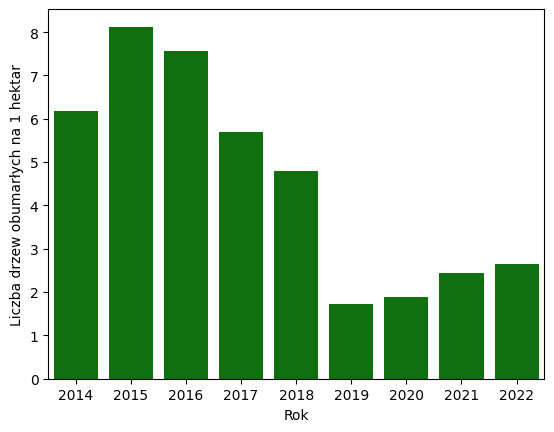

In [38]:
sns.barplot(data = df_intensity, x = df_intensity['rok'], y = df_intensity['gęstość'],
           color = 'green')
plt.xlabel("Rok")
plt.ylabel("Liczba drzew obumarłych na 1 hektar")

## statistical tests

#### data preparation and visualization of the DBH distribution

###### 2014-2018

In [39]:
mask = ((dbh_dead['Rok'] >= 2014) & (dbh_dead['Rok'] <= 2018))
s_2014_2018 = pd.DataFrame(dbh_dead[mask]).reset_index(drop = True)['Pierśnica']

d_2014_2018 = pd.concat([s_2014_2018, dbh_living['2018-żywe'].dropna()], axis = 1)
d_2014_2018.rename(columns = {
    'Pierśnica':'2014-2018 martwe',
    '2018-żywe': '2018 żywe'}, inplace = True)

d_2014_2018

,2014-2018 martwe,2018 żywe
0,65,10.0
1,50,11.0
2,39,12.0
3,49,12.0
4,36,12.0
...,...,...
2290,NaN,95.0
2291,NaN,98.0
2292,NaN,99.0
2293,NaN,99.0


Text(0, 0.5, 'Liczebność')

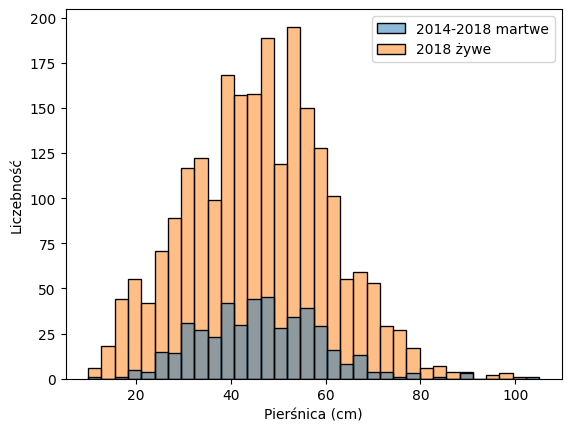

In [40]:
sns.histplot(d_2014_2018)
plt.xlabel("Pierśnica (cm)")
plt.ylabel("Liczebność")

In [41]:
ks_2samp(d_2014_2018.iloc[:,0].dropna(), d_2014_2018.iloc[:,1].dropna())

KstestResult(statistic=0.055775290564485214, pvalue=0.1719538524877319)

###### 2019-2022

In [42]:
mask = ((dbh_dead['Rok'] >= 2019) & (dbh_dead['Rok'] <= 2022))
s_2019_2022 = pd.DataFrame(dbh_dead[mask]).reset_index(drop = True)['Pierśnica']

d_2019_2022 = pd.concat([s_2019_2022, dbh_living['2022-żywe'].dropna()], axis = 1)
d_2019_2022.rename(columns = {
    'Pierśnica':'2019-2022 martwe',
    '2022-żywe': '2022 żywe'}, inplace = True)

d_2019_2022

,2019-2022 martwe,2022 żywe
0,54,10.0
1,26,11.0
2,33,12.0
3,54,12.0
4,58,12.0
...,...,...
2209,NaN,95.0
2210,NaN,98.0
2211,NaN,99.0
2212,NaN,99.0


Text(0, 0.5, 'Liczebność')

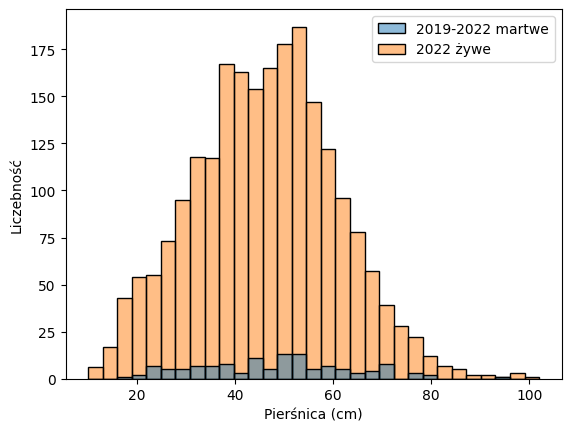

In [43]:
sns.histplot(d_2019_2022)
plt.xlabel("Pierśnica (cm)")
plt.ylabel("Liczebność")

In [44]:
ks_2samp(d_2019_2022.iloc[:,0].dropna(), d_2019_2022.iloc[:,1].dropna())

KstestResult(statistic=0.08891418247515809, pvalue=0.28866312499634056)

###### 2014-2022

In [45]:
mask = ((dbh_dead['Rok'] >= 2014) & (dbh_dead['Rok'] <= 2022))
s_2014_2022 = pd.DataFrame(dbh_dead[mask]).reset_index(drop = True)['Pierśnica']

d_2014_2022 = pd.concat([s_2014_2022, dbh_living['2022-żywe'].dropna()], axis = 1)
d_2014_2022.rename(columns = {
    'Pierśnica':'2014-2022 martwe',
    '2022-żywe': '2022 żywe'}, inplace = True)

d_2014_2022

,2014-2022 martwe,2022 żywe
0,65,10.0
1,50,11.0
2,39,12.0
3,49,12.0
4,36,12.0
...,...,...
2209,NaN,95.0
2210,NaN,98.0
2211,NaN,99.0
2212,NaN,99.0


Text(0, 0.5, 'Liczebność')

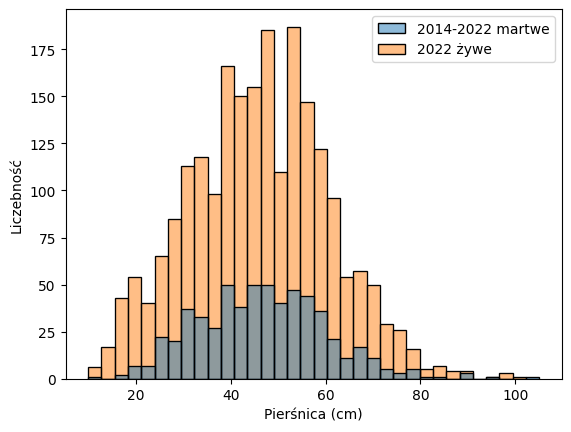

In [46]:
sns.histplot(d_2014_2022)
plt.xlabel("Pierśnica (cm)")
plt.ylabel("Liczebność")

In [47]:
ks_2samp(d_2014_2022.iloc[:,0].dropna(), d_2014_2022.iloc[:,1].dropna())

KstestResult(statistic=0.04350258392600846, pvalue=0.3292262743076923)